# Analyzing continuous-time and discrete-time signals in frequency domain.

In [122]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal

## 2.1 Fourier Series Approximation
The Fourier series analysis equation for a continuous time periodic signal $x(t), having the period $T$, angular
frequency $\omega_0, (=2\pi/T)$ is given by:
$$a_k = \frac{1}{T}\int_{T} x(t)e^{-jk \omega_0 t}dt$$

Fourier series coefficients for the following square wave:
![](image2.1.png)

$$ x(t)=   \left\{
\begin{array}{ll}
      1 & |t|<T_1 \\
      0 & T_1<|t|<T/2 
\end{array} 
\right.  $$
<br></br>
$$a_0 = \frac{1}{T}\int_{T} x(t)dt = \frac{1}{T}\int_{-T_1}^{T_1} 1dt = \frac{2T_1}{T}$$
since $T_1$ = $\frac{T}{4}$
$$a_0 = \frac{1}{2}$$
<br></br>
$$a_k = \frac{1}{T}\int_{T} x(t)e^{-jk \omega_0 t}dt$$
$$ = \frac{1}{T}\int_{-T_1}^{T_1} e^{-jk \omega_0 t}dt $$
$$= \frac{1}{T}\frac{e^{-jk \omega_0 T_1}-e^{jk \omega_0 T_1}}{-jk \omega_0} $$
$$= \frac{1}{T}\frac{-2jsin(\frac{2\pi k T_1}{T})}{-jk \omega_0} $$

since $T_1$ = $\frac{T}{4}$
$$a_k = \frac{1}{k\pi}[sin(\frac{\pi k}{2})]$$
for even k, 
$$a_k = 0$$ 
for odd k, 
$$a_k = \frac{1}{k\pi}[sin(\frac{\pi k}{2})]$$

$$ a_k=   \left\{
\begin{array}{ll}
      \frac{1}{2} & k = 0 \\
      \frac{1}{k\pi}[sin(\frac{\pi k}{2})] & k \neq 0
\end{array} 
\right.  $$


## Returning Fourier series coefficients of the squre wave for any given integer k
Let A = 1V, T=1s


In [123]:
# Square pulse
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s=1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s=0
    return s

# Fourier series coefficients
def a(k):
    # Your code goes here
    T = 1
    A = 1

    if k == 0:
        a_k = 1 /2
    else:
        if k % 2 == 0:
            a_k = 0
        else:
            a_k = 1 * np.sin(k * np.pi / 2) / (k * np.pi)
    return a_k
    

### Function fs_approx(t,N) returns the Fourier series approximated periodic signal, at any given time.

In [124]:
def fs_approx(t, N):
    x_t = 0
    for k in range(-N, N+1):
        a_k = a(k)
        W_0 = 2 * np.pi / 1
        x_t += a_k * np.exp(1j * k * W_0 * t)
    return x_t.real


### Updating the python script according to the following given guidelines.
1. Create the array t with equally spaced 1000 elements in the interval [-2.5,2.5]

In [125]:
time = np.linspace(-2.5, 2.5, 1000)

2. Use the `square(t)` function to fill the array x with the values of square wave at each time instant in the
array C

In [126]:

x = [square(i) for i in time]

3. se the function `fs_approx(t,N)` to fill the array y with the function values of the Fourier series approximated square wave

In [127]:
Y =[]
N = 5
for t in time:
    Y.append(fs_approx(t, N))


### Plottig the Original signal $x(t)$ and approximated signal $x_N(t)$
<ul><li>When N = 5</li></ul>


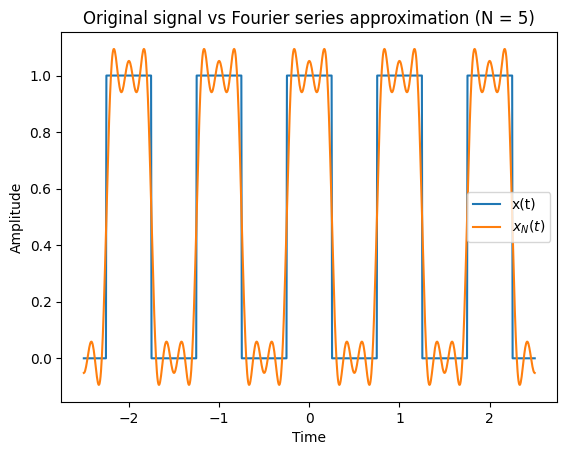

In [128]:
fig, ax = plt.subplots()
ax.plot(time, x, label='x(t)')
ax.plot(time, Y, label=r'$x_N(t)$')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Original signal vs Fourier series approximation (N = 5)')
ax.legend()
plt.show()


<ul><li>When N = 50</li></ul>

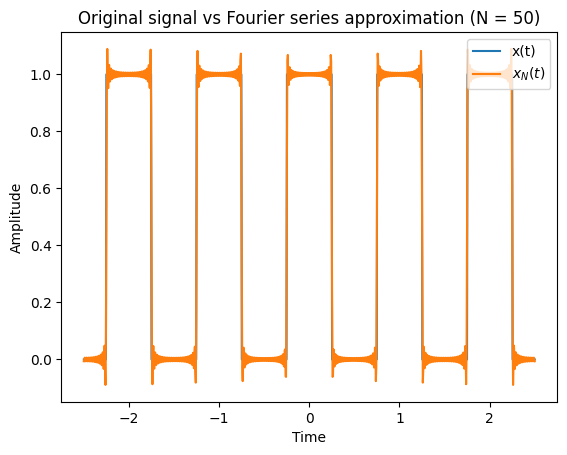

In [129]:
time = np.linspace(-2.5, 2.5, 1000)

x = [square(i) for i in time]

Y =[]
N = 50
for t in time:
    Y.append(fs_approx(t, N))

fig, ax = plt.subplots()
ax.plot(time, x, label='x(t)')
ax.plot(time, Y, label=r'$x_N(t)$')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Original signal vs Fourier series approximation (N = 50)')
ax.legend(loc='upper right')
plt.show()


#### Observation: When number N is increased, the approximated signal $x_N(t)$ converges close to the original signal $x(t)$.

## 2.2 Fourier Series Coefficients


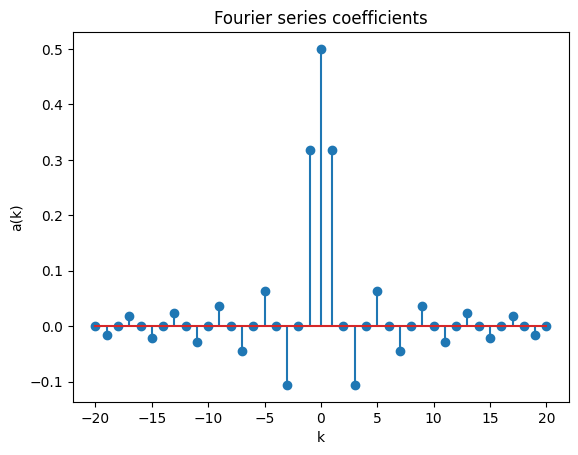

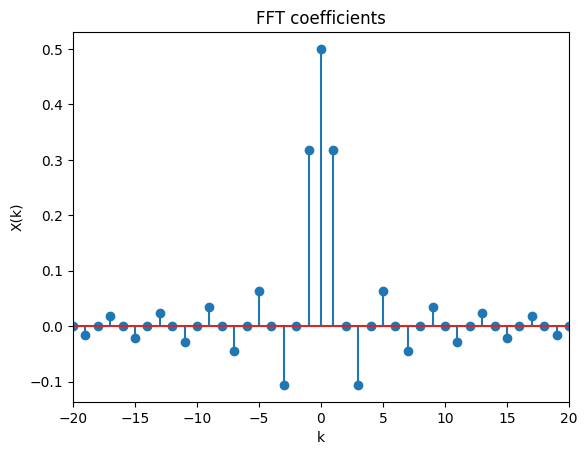

In [130]:
k = np.linspace(-20, 20, 41)
ak = [a(i) for i in k]
fig, axes = plt.subplots()
axes.stem(k, ak)
axes.set_xlabel('k')
axes.set_ylabel('a(k)')
axes.set_title('Fourier series coefficients')
plt.show()

N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))

# Obtaining FFT coefficients
X = fftshift(fft(x))
# normalizing the fft coefficients
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)

# plotting fft coefficients
fig, axes = plt.subplots()
axes.stem(k, X_norm)
axes.set_xlim(-20, 20)
axes.set_xlabel('k')
axes.set_ylabel('X(k)')
axes.set_title('FFT coefficients')
plt.show()

#### Observation: Fourier series coefficients of the square wave for each k value is simillar to the normalized Fast Fourier Transform (FFT) coefficients of the square wave. The envelop of the Fourier coefficients is a sinc function. 
Discrte time Fourier series coefficients for a periodic signal,
$$a_k = \frac{1}{N}\sum_{n=0}^{N-1} x[n]e^{-j2\pi kn/N}$$
where N is the number of samples in the signal x[n].

Discrete-time fourier transform (DTFT) of a Aperiodic signal x[n] is given by,
$$X(j\omega) = \sum_{n=0}^{N-1} x[n]e^{-j\omega n}$$
where N is the number of samples in the signal x[n].

Normalized fourier transform (FT) of a Aperiodic signal x[n] is given by,
$$X(j\omega) = \frac{1}{N}\sum_{n=0}^{N-1} x[n]e^{-j\omega n}$$
where N is the number of samples in the signal x[n].
#### so we can observe that the $a_k$ is simillar to $X(j\omega)$.

## 2.3 Ideal Filters and Actual Filters
Observing the filtering operation of ideal filters and actual filters by passing a waveform containing sinusoids with different frequencies through the filters.
Function to return value $x(t)$ of the waveform at any given time t.
$$x(t) = a_1sin(\omega_1t) + a_2sin(\omega_2t) + a_3sin(\omega_3t)$$
where $a_1 = 0.75, a_2 = 1, a_3 = 0.5, \omega_1 = 100\pi, \omega_2 = 400\pi, \omega_3 = 800\pi$

In [131]:
# Creating 3 sinusoidal signals
# Your code goes here
w1 = 100 * np.pi
w2 = 400 * np.pi
w3 = 800 * np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2*np.pi*fs
def x(t):
    # Your code goes here
    x_t = a1 * np.sin(w1 * t) + a2 * np.sin(w2 * t) + a3 * np.sin(w3 * t)
    return x_t

Plotting the Waveform in time domain.

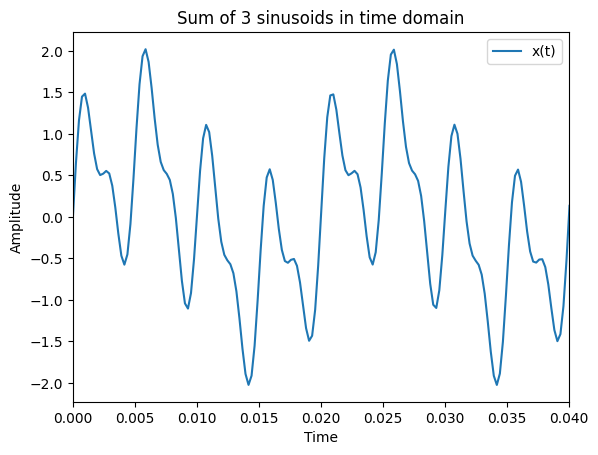

In [132]:
time = np.linspace(0, 1, fs + 1)

xt = [x(t_) for t_ in time]



fig, ax = plt.subplots()
ax.plot(time, xt, label='x(t)')
ax.set_xlim(0, 0.04)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Sum of 3 sinusoids in time domain')
ax.legend(loc='upper right')
plt.show()


Absolute value of the Fourier transform of $x(t)$

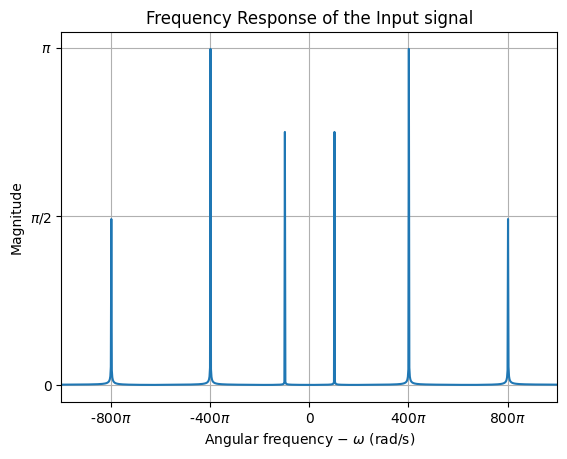

In [133]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Plotting the input signal in frequency domain
fig, ax = plt.subplots()
ax.plot(w, abs(Xw))

ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

## Ideal Filter
Ideal Filter $H(j\omega)$ is given by,
$$H(j\omega) =   \left\{
\begin{array}{ll}
      1 & \omega_{c1}<|\omega|<\omega_{c2} \\
      0 & otherwise
\end{array}
\right.  $$
where $\omega_{c1} and \omega_{c2}$ are the cut-off frequencies of the filter.

#### Ideal filter function.

In [134]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
    # Your code goes here
    if abs(w) > wc1 and abs(w) < wc2:
        gain = 1
    else:
        gain = 0
    return gain

## 2.3.1 Ideal Filter : Part A
Useing the `ideal_filter(w)` function to fill the list H0w with the values of the ideal filter at each frequency in the list w.

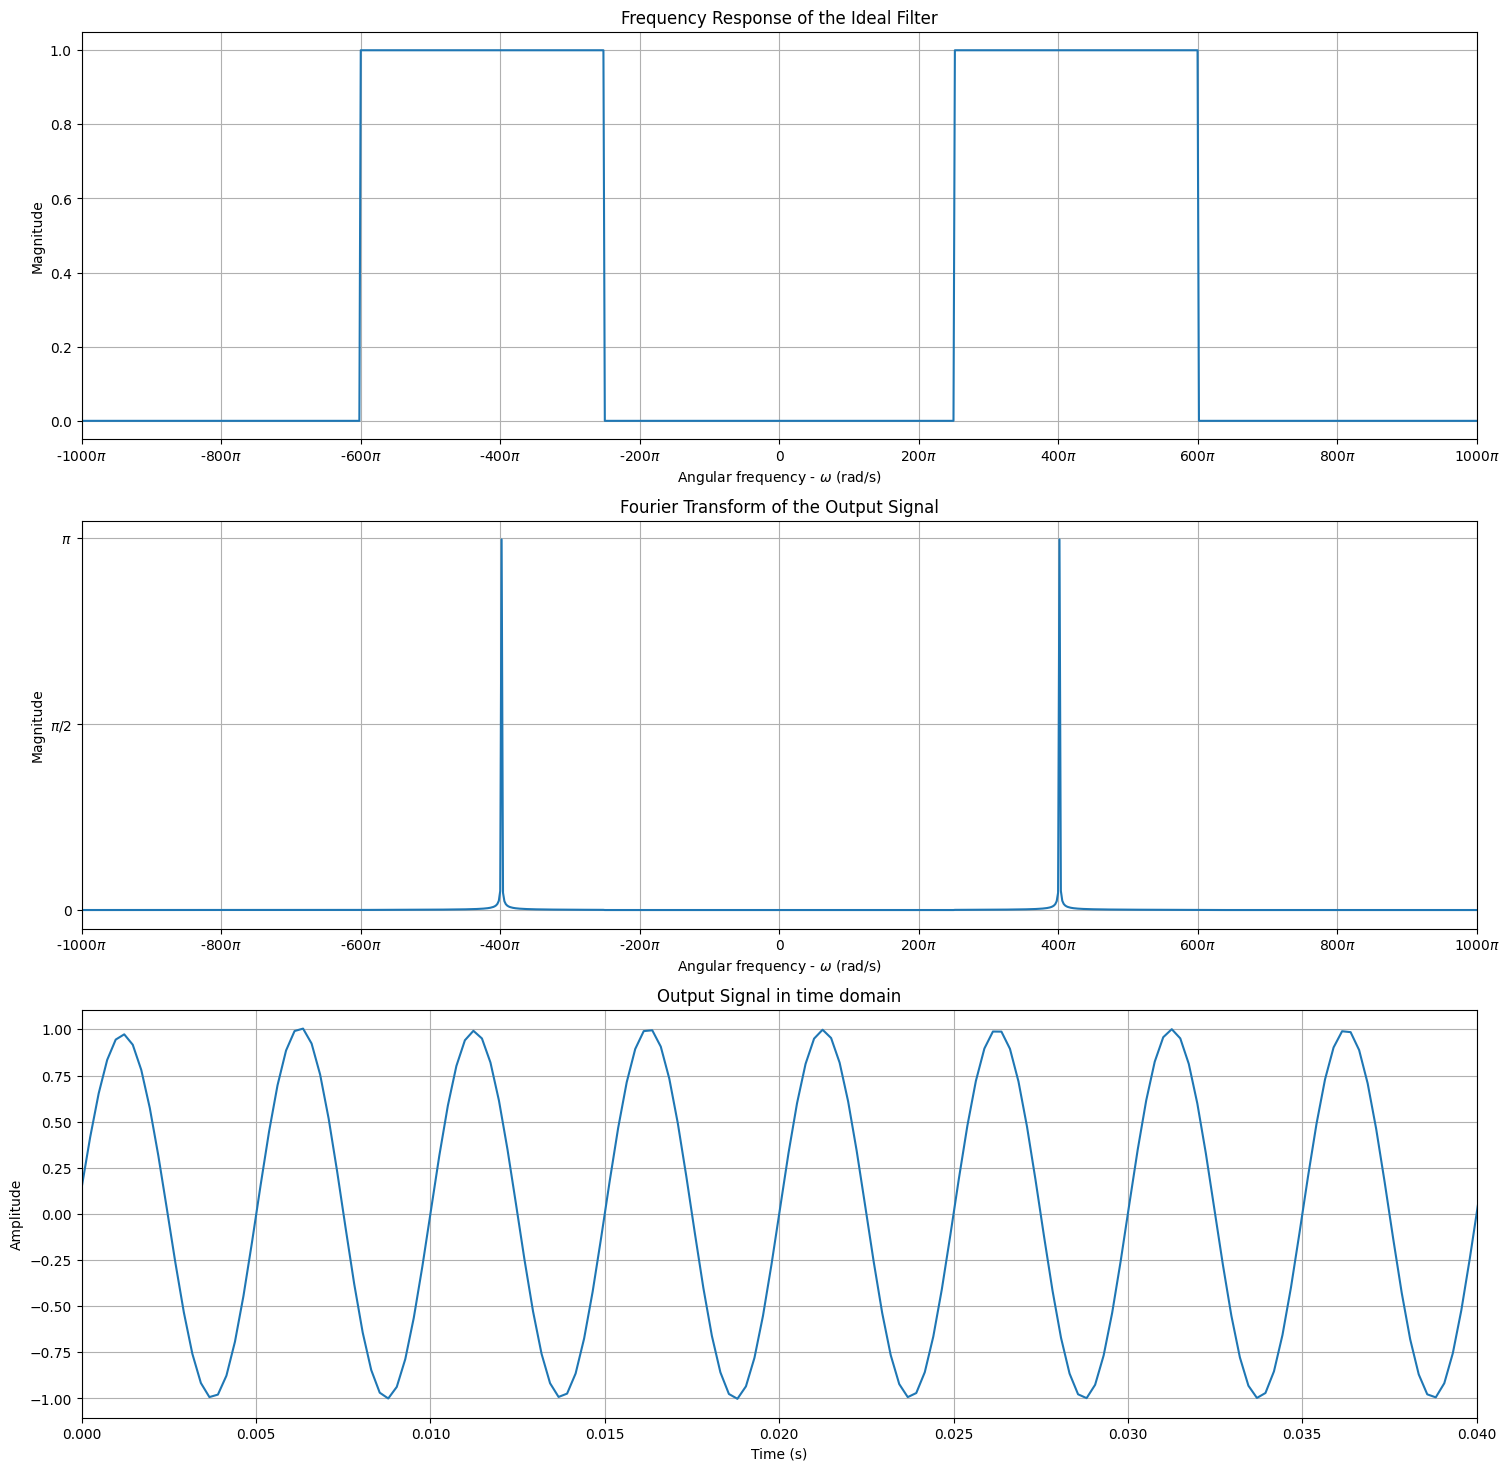

In [135]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Your code goes here

H0w = [ideal_filter(w_) for w_ in w]
# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)
# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))
# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

## Ideal Filter : Part B

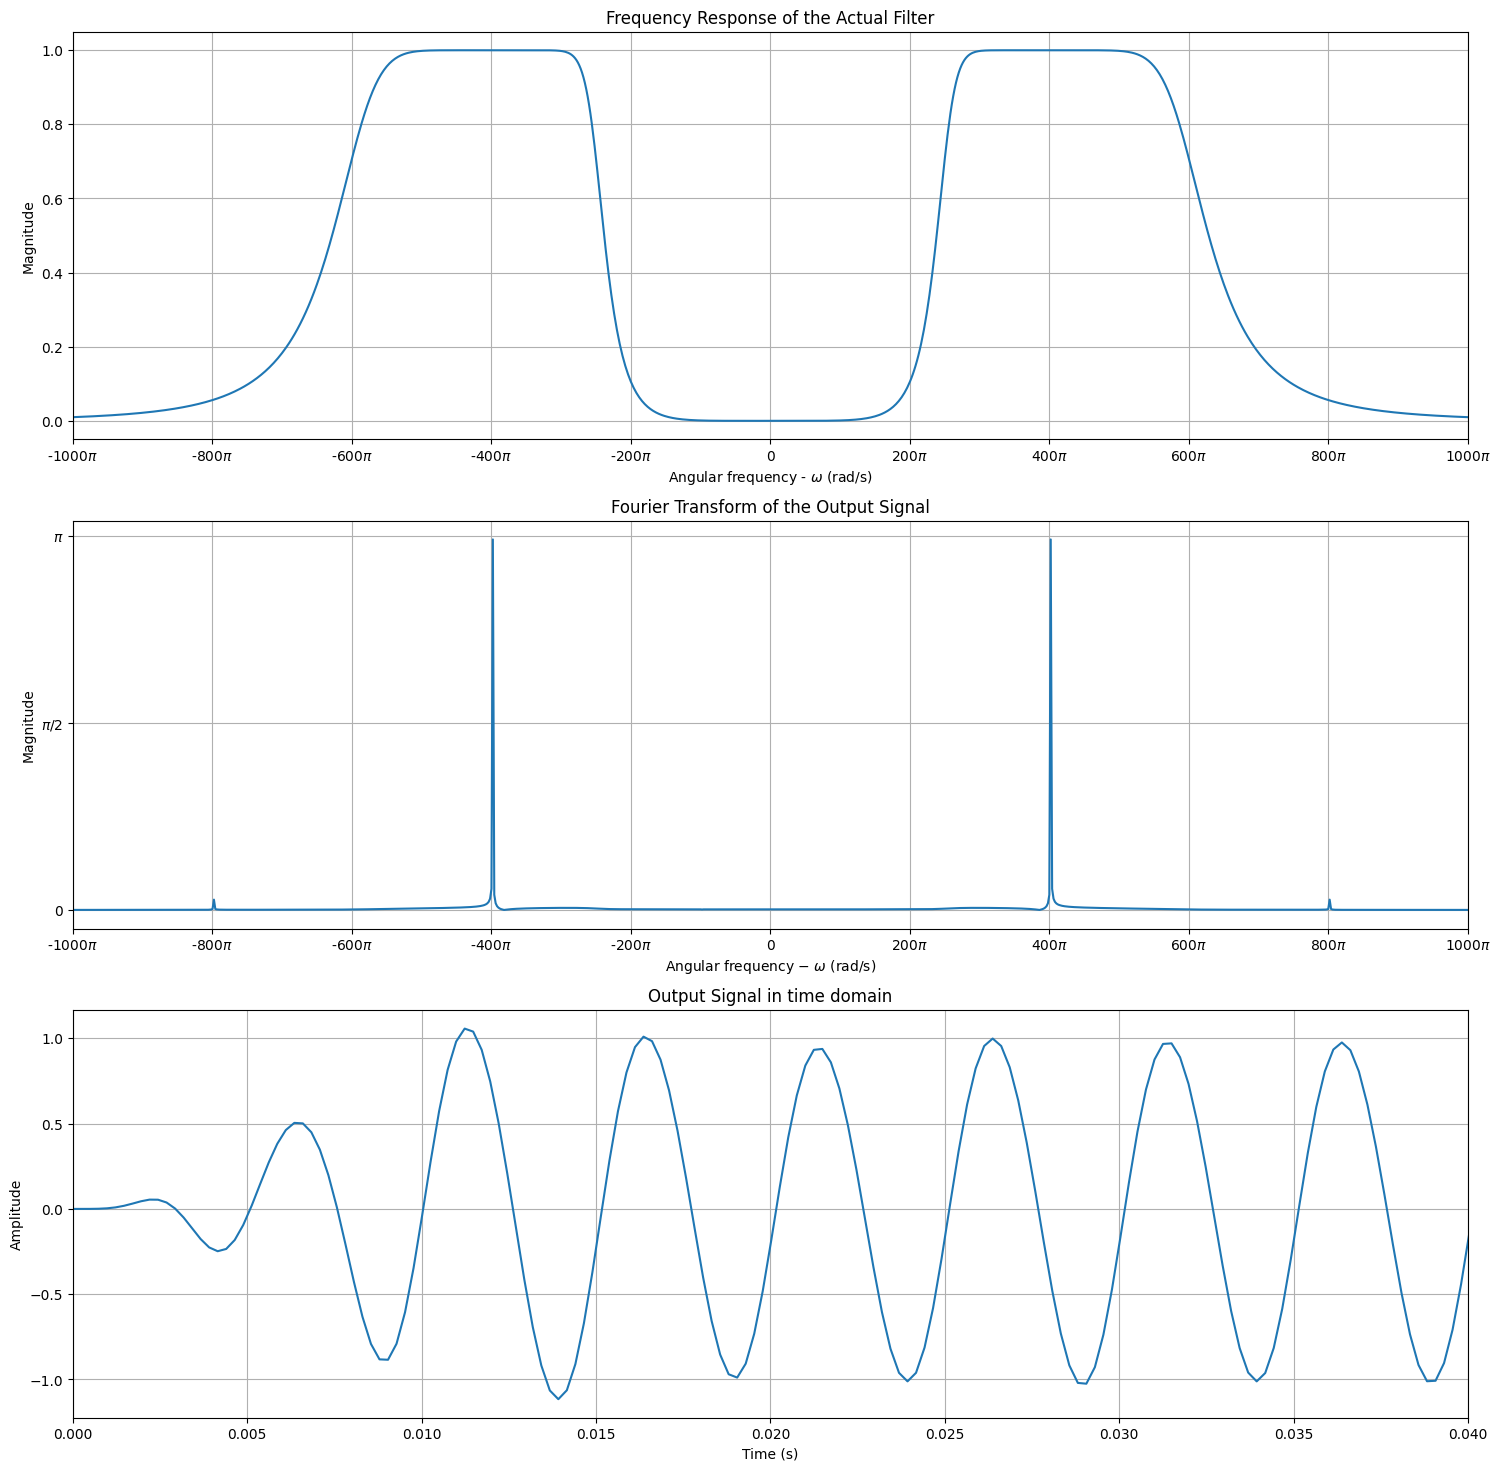

In [136]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)
# Filtering
y = signal.lfilter(b,a,xt)
# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)
# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# # Output signal in time domain
axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

#### Observations: e ideal filter exactly filters out the frequencies outside the cut-off frequencies. The ideal filter is not realizable in practice because it requires infinite time and infinite resources to implement. The actual filter is a practical approximation of the ideal filter. It can't filter out the frequencies outside the cut-off frequencies completely. It just reduces the amplitude of the frequencies outside the cut-off frequencies.

## 2.4 Removing Power Line Noise in an ECG Signal

Task 1: Write a python script to read the data in the file ecg_signal.csv and fill the list ecg with the data.

In [137]:
# Reading the ECG data
ecg = []
with open('ecg_signal.csv', 'r') as file:
    for line in file:
        ecg.append(float(line.strip()))
duration = 10 # seconds
T = duration/len(ecg)
Fs = 1/T
# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

Task 2: Plot the absolute value of the Fourier transform with respect to frequency. Limit the G-axis to the interval [-100, 100]

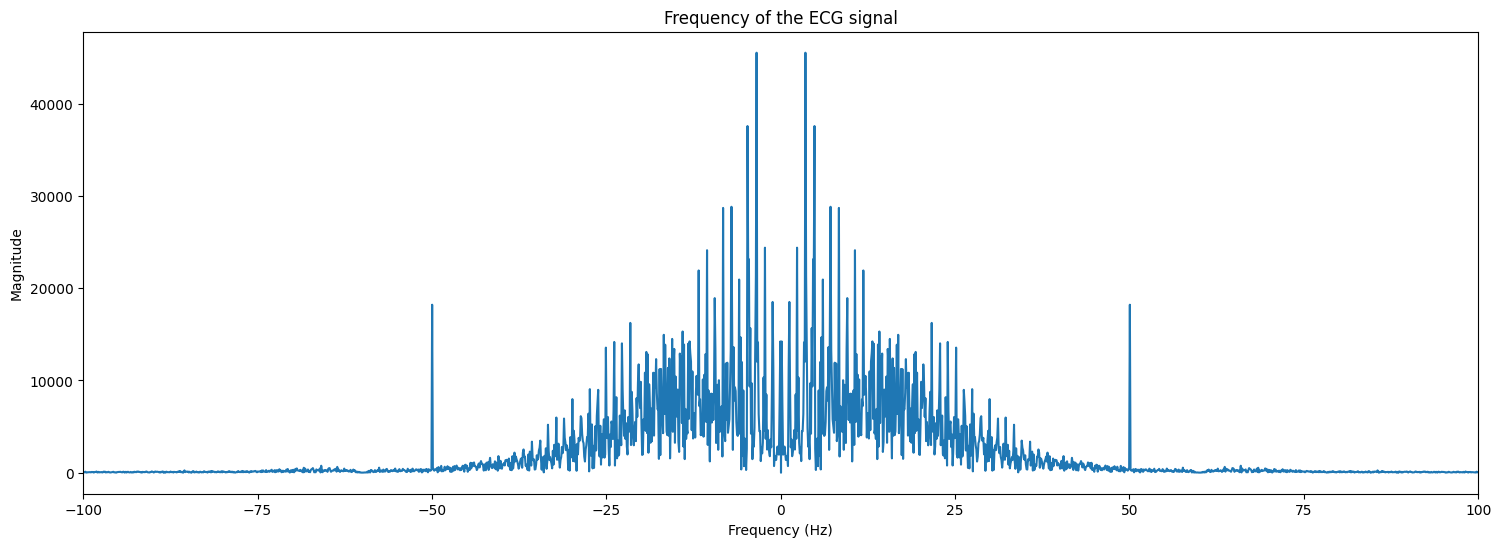

In [138]:
# Plotting the input signal in frequency domain
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(fr, abs(F))
ax.set_xlim(-100, 100)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Frequency of the ECG signal')
plt.show()

Task 3. What type of filter that can be used to remove the noise at 50 Hz?

Band Stop Filter can be used to remove teh Noise at 50HZ


Task 4. Edit the code below with the correct name of the filter selecting from the table given below. Execute the cell and sketch the frequency response of the filter.

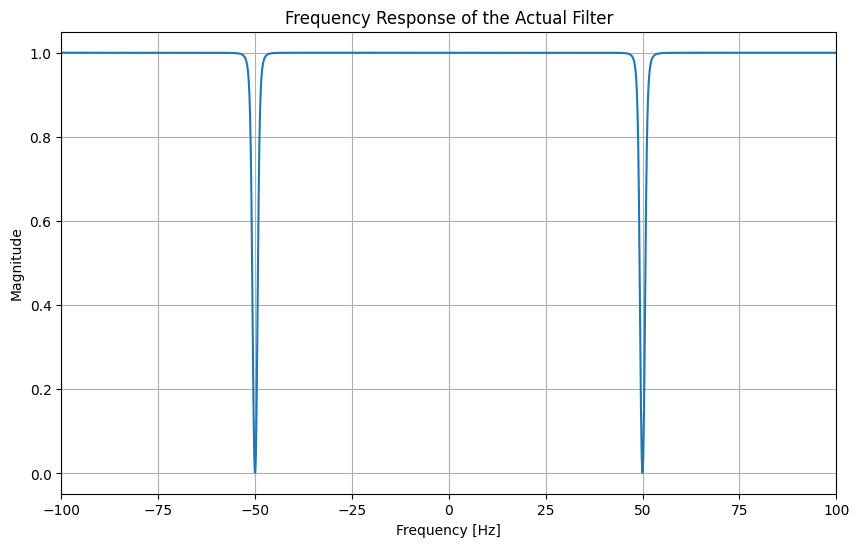

In [139]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop' # EDIT HERE
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)
# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)
# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()

Task 5. Edit the given below to plot the input and the output waveforms vs time.Use the subplots function to plot thegraphs in two axes in the same figure. Limit the G-axis to the interval [0, 3].

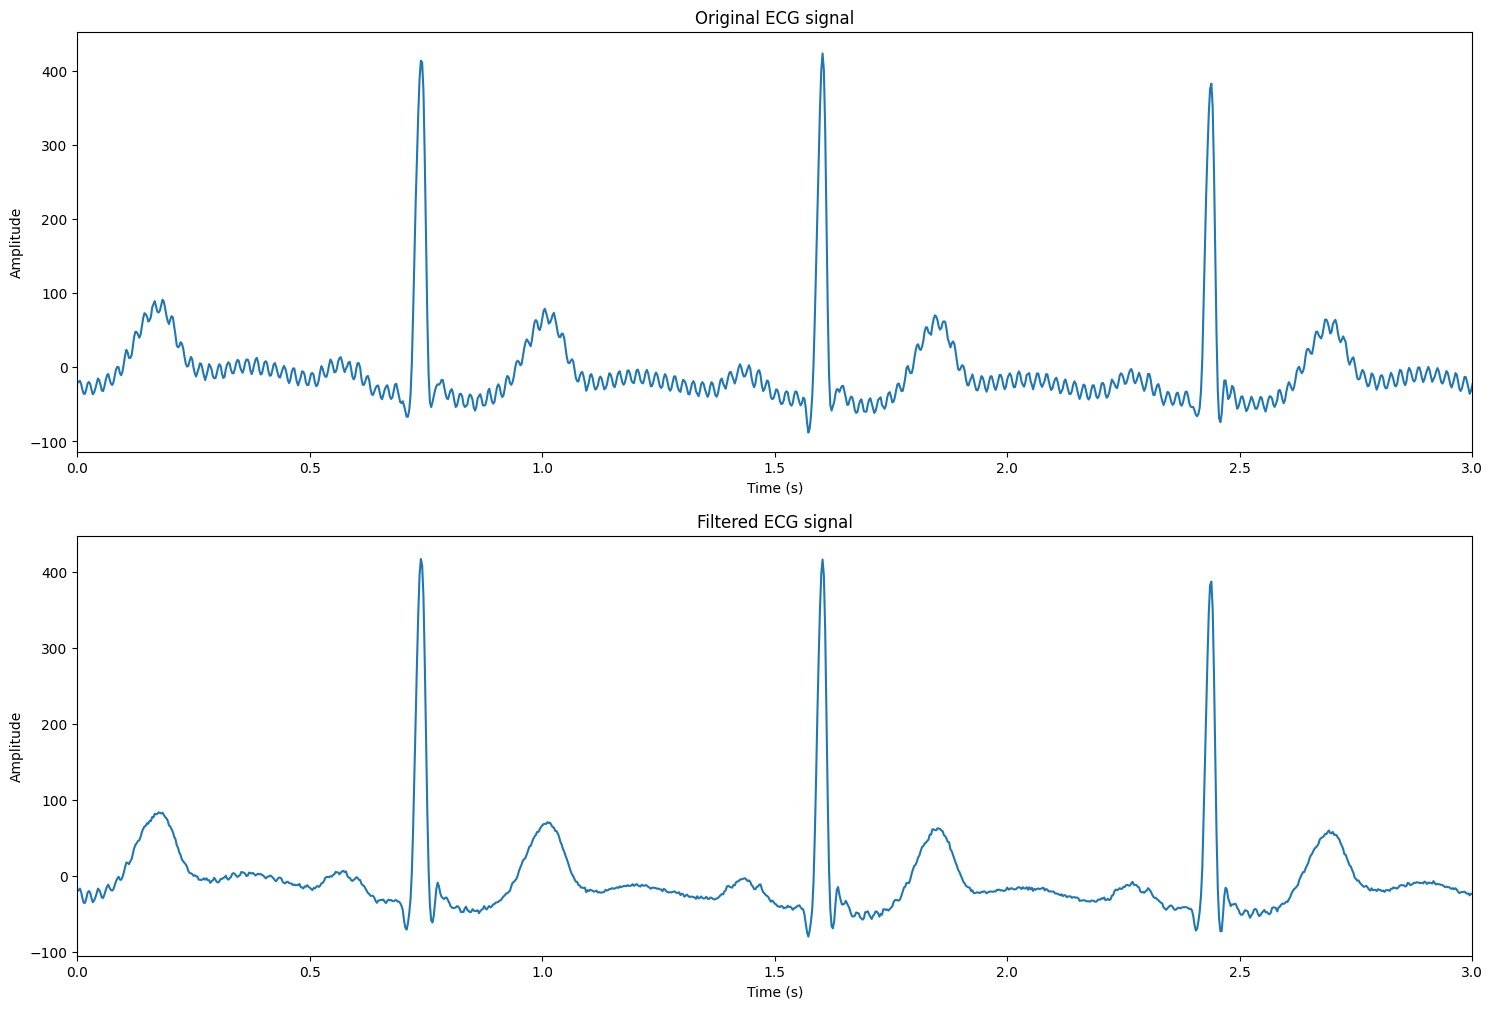

In [140]:
time = np.arange(T, duration+T, T)
# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

fig, ax = plt.subplots(2, 1, figsize = (18, 12))
ax[0].plot(time, ecg, label='Original ECG signal')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time (s)')
ax[0].set_xlim(0, 3)
ax[0].set_title('Original ECG signal')

ax[1].plot(time, output, label='Filtered ECG signal')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlim(0, 3)
ax[1].set_title('Filtered ECG signal')
plt.show()



Task 6. Complete the code in below to plot the absolute value of Fourier transform of the output waveform with respect
to the frequency. Limit the x axis to the interval [-100, 100]

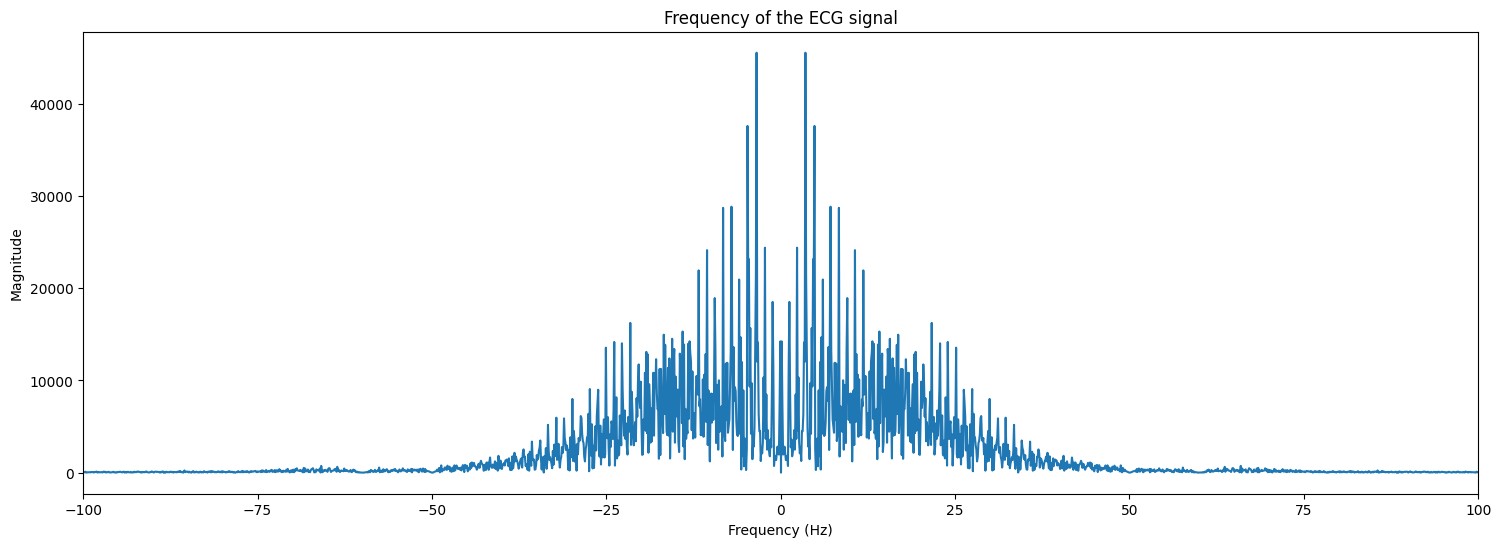

In [141]:
F = fftshift(fft(output))
fig, ax = plt.subplots(figsize = (18, 6))
ax.plot(fr, abs(F))
ax.set_xlim(-100, 100)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Frequency of the ECG signal')
plt.show()